In [1]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes, nms_boxes
import os
import yolo
from yolo.frontend import create_yolo
%matplotlib inline
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [5]:
# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416,)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

Loading pre-trained weights in svhn/weights.h5
0-boxes are detected. detected\1.png saved.


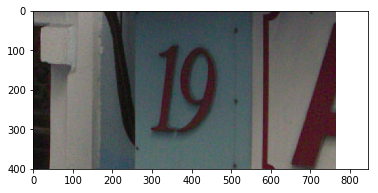

0-boxes are detected. detected\2.png saved.


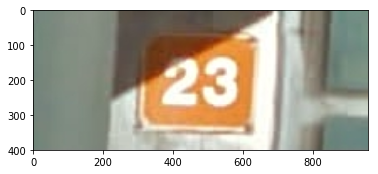

0-boxes are detected. detected\person (1).jpg saved.


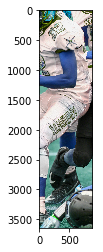

6-boxes are detected. detected\person (12).jpg saved.


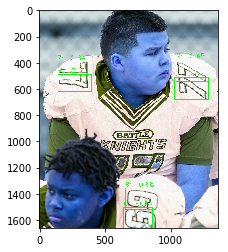

1-boxes are detected. detected\person (15).jpg saved.


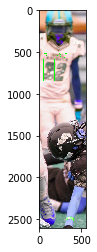

1-boxes are detected. detected\person (2).jpg saved.


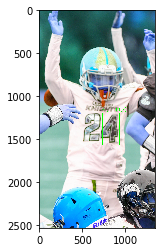

2-boxes are detected. detected\person (8).jpg saved.


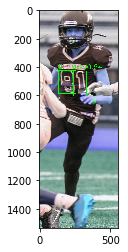

0-boxes are detected. detected\person (9).jpg saved.


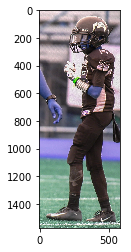

ZeroDivisionError: float division by zero

In [ ]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "svhn/weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

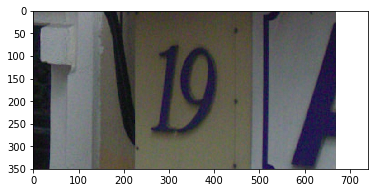

(350, 741, 3)


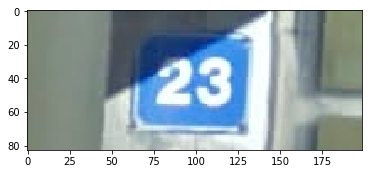

(83, 199, 3)


In [60]:
# 3. Load images
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()
    print(np.shape(img))

2-boxes are detected.


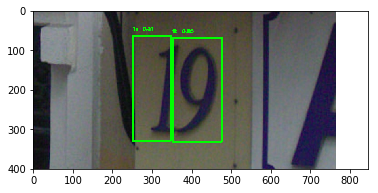

2-boxes are detected.


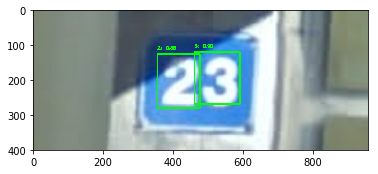

In [61]:
# 4. Predict digit region

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)
#     print(probs)
#     boxes = nms_boxes(boxes, 10, nms_threshold=0.3, obj_threshold=0.6)
#     probs = [0 for b in range(len(boxes))]
    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()


In [62]:
# !pip install keras==2.1.1

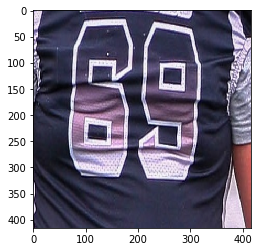

(416, 416, 3)


In [65]:
img_files=[r"D:\Projects\RetrieveByJerseyNumber\Yolo-digit-detector-master\SYFL NATIONALS 12-14-18\detections\11.jpg-objects\person-5_c.jpg"]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(416,416))
    imgs.append(img)
    plt.imshow(img)
    plt.show()
    print(np.shape(img))

1-boxes are detected.


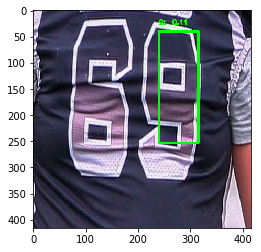

9


In [66]:
THRESHOLD = 0.1
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
    number = ''
    for p in probs:
        number+=str(np.argmax(p))
    
    print(number)


In [36]:
np.argmax(probs[2])

2

In [ ]:
!python train.py -c configs/from_scratch.json

In [ ]:
!python train.py -c configs/from_scratch2.json

In [7]:
!python evaluate.py -c configs/from_scratch.json -w svhn/weights.h5

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

Using TensorFlow backend.







Traceback (most recent call last):
  File "evaluate.py", line 89, in <module>
    print(calc_score(n_true_positives, n_truth, n_pred))
  File "D:\Projects\RetrieveByJerseyNumber\Yolo-digit-detector-master\yolo\backend\utils\eval\fscore.py", line 31, in calc_score
    fscore = 2* precision * recall / (precision + recall)
ZeroDivisionError: float division by zero
